# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #1
**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 1st, 2018 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
import numpy as np
from scipy.stats import gaussian_kde as gaussian
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
%matplotlib inline

## Problem 1: Bayes Theorem

**Coding not required**

### Part A:
Your child has been randomly selected for Type I diabetes screening, using a highly accurate new test that boasts of a false positive rate of 1% and a false negative rate of 0%. The prevalence of of Type I diabetes in children is approximately 0.228%. 

1.Should your child test positive, what is the probability that he/she has Type I diabetes?

2.Should you be concerned enough to ask for further testing or treatment for your child? Suppose an independent test with the same false positive/false negative rate is available.

Later, you read online that Type I diabetes is 6 times more prevalent in prematurely born children. 

3.If this statistic is true, what is the probability that your child, who is prematurely born, has Type I diabetes?

4.Subjectively, given the new information, should you be concerned enough to ask for treatment for your child?

**Justify your decisions using your calculations.**


#### Solutions


**Question 1:  Should your child test positive, what is the probability that he/she has Type I diabetes?**

Let $T$ indicate the event that the test is positive (and $\neg T$ be the event that the test is negative), let $D$ indicate the event that diabetes is present (and $\neg D$ indicate the disease's absence). Thus, the probability in which we're interested is $\mathrm{P}(D | T)$, that is, the probability that the child has diabetes after receiving a positive test result. 

Using Bayes Theorem, we can expand the probabiltiy $\mathrm{P}(D | T)$ as follows
\begin{aligned}
\mathrm{P}(D| T) &= \frac{\mathrm{P}(D, T )}{\mathrm{P}(T)}\\
&= \frac{\mathrm{P}(T | D)\mathrm{P}(D)}{\mathrm{P}(T)}\\
&= \frac{\mathrm{P}(T | D)\mathrm{P}(D)}{\mathrm{P}(T | D)\mathrm{P}(D) + \mathrm{P}(T | D)\mathrm{P}(D)}
\end{aligned}

Now, $\mathrm{P}(T | D)$ is the accuracy rate of the test and it is equivalent to $1 - \mathrm{P}(\neg T | D)$, where $\mathrm{P}(\neg T| D)$ is the false negative rate (the rate that the test returns a negative result given that the patient is actually diabetic). Since the false negative rate is reported to be 0%, $\mathrm{P}(T | D ) = 1$. We also have that $\mathrm{P}(T | \neg D) = 0.01$ since the reported false positive rate is 1%. Finally, we are given that the probability of observing diabetes in a random child, $\mathrm{P}(D)$ is 0.00228.

Thus, we get that 
$$
\mathrm{P}(D  | T) = \frac{1 * 00228}{1 * 00228 + 0.01(1 - 0.00228)} \approx 0.19
$$

Given a positive test result, there is only a 19% chance that the child has diabetes. I guess I wouldn't be that worried.


**Question 2:  Should you be concerned enough to ask for further testing or treatment for your child? Suppose an independent test with the same false positive/false negative rate is available.**

Just kidding!!!  Nothing is certain in life except for death and taxes, and we're not even sure about the taxes part -- maybe they are kinda optional too if you're smart/lucky/rich/broke/brave/uncaring enough.  A 19% chance of diabetes shouldn't drive one to drink (sugary cocktails), but it's maybe worth an additional test if you can find one if for no other reason than a chance to do more basic Bayesian calculations!!!  And just our fortune, we have one at hand.  And we're smart/lucky/rich/broke/brave/uncaring enough to convince our child to take it.

There are two possibilities for the results of the second test.  Possibility 1 is that the second test returns a negative result.  In that case our child does not have the disease because both tests are constructed in such a way that there is no chance of a false negative.  The **FNR** or **False Negative Rate** is 0.  Yay!  We can drink (sugary cocktails) to celebrate!

Possibility 2 is that the second test returns a positive result.  Sad.  We should then get along with the business of calculating the new probability that our precious little child has has the disease. The observed data are Test 1 positive i.e. **$T_1$** and Test 2 positive i.e. **$T_2$**.

In terms of the child's health there are also two alternatives:

Alternative 1:  Child has the disease ($D$)
$$\begin{aligned}
\mathrm{P}(T_1, T_2|D)\mathrm{P}(D) &= \mathrm{P}(D)\mathrm{P}(T_1| D)\mathrm{P}(T_2| D)\\
&= (.0028)(1)(1)\\
&=.0028\\
\end{aligned}
$$

Alternative 2:  Child doesn't have the disease ($\neg D$)
$$\begin{aligned}
\mathrm{P}(T_1, T_2|\neg D)\mathrm{P}(\neg D) &= \mathrm{P}(\neg D)\mathrm{P}(T_1|\neg D)\mathrm{P}(T_2| \neg D)\\
&= (.99772)(.01)(.01)\\
&=0.00009972\\
\end{aligned}
$$


We know from Bayes theorem that the posterior probability of of $D$  -- our child having the disease -- given positive outcomes on both tests is equal to the the likelihood that our child has a positive outcome on both tests given that she has the disease times the prior probability of our child having the disease divided by the Evidence i.e. the probability of a positive outcome on both tests.

$$\begin{aligned}
\mathrm{P}(D|T_1,T_2)&= \frac{\mathrm{P}(T_1, T_2|D)\mathrm{P}(D)}{\mathrm{P}(T_1,T_2)}\\
&=\frac{\mathrm{P}(T_1|D)\mathrm{P}(T_2|D)\mathrm{P}(D)}{\mathrm{P}(T_1,T_2)}\\
&=\frac{\mathrm{P}(T_1|D)\mathrm{P}(T_2|D)\mathrm{P}(D)}{\mathrm{P}(T_1, T_2|\neg D)\mathrm{P}(\neg D) + \mathrm{P}(T_1, T_2|D)\mathrm{P}(D)}\\
&=\frac{.0028}{.0028+0.00009972}\\
&= 0.965\\
\end{aligned}
$$


 
Wow!  The additional data point of a positive resut on a second test has dramatically increased the probability of the child actually having diabetes from ~ 20% to an attention getting ~ 96%. The additional certainty gained by doing a second test is almost certainly worth the costs/headaches are involved. 
 

**Question 3.  If this statistic is true, what is the probability that your child, who is prematurely born, has Type I diabetes?.**


Now, suppose this kid is also premature. Let $P$ be the event that the child is premature. If we accept the online statistics that diabetes is 6 times more prevalent in premature children than in regular children, then we have $\mathrm{P}(D| P) = 6* P(D) = 0.01368$. This time, the probability we want to compute is $\mathrm{P}(D | T, P)$. Again, using Baye's Theorem, we expand this quantity:
\begin{aligned}
\mathrm{P}(D | T,  P) &= \frac{\mathrm{P}(D, T, P)}{\mathrm{P}(T, P)}\\
&= \frac{\mathrm{P}(T | D , P)\mathrm{P}(D| P)\mathrm{P}(P)}{\mathrm{P}(T | D, P)\mathrm{P}(D|P)\mathrm{P}(P) + \mathrm{P}(T | \neg D, P)\mathrm{P}(\neg D | P)\mathrm{P}(P)}\\
&= \frac{\mathrm{P}(T | D , P)\mathrm{P}(D| P)}{\mathrm{P}(T | D, P)\mathrm{P}(D|P) + \mathrm{P}(T | \neg D, P)\mathrm{P}(\neg D | P)}\\
\end{aligned}

Here we make the assumption that $\mathrm{P}(T | D , P) = \mathrm{P}(T | D) $ and $\mathrm{P}(T | \neg D, P) = \mathrm{P}(T | \neg D)$. That is, the false positive and negative rates of the test depend only on the presence of diabetes. This assumption is reasonable given the wording describing the test. Finally, the above becomes:
\begin{aligned}
\mathrm{P}(D | T,  P) &= \frac{\mathrm{P}(T | D)\mathrm{P}(D| P)}{\mathrm{P}(T | D)\mathrm{P}(D|P) + \mathrm{P}(T | \neg D)\mathrm{P}(\neg D | P)}\\
&= \frac{1 * 6* 0.00228}{1 * 6* 0.00228 + 0.01(1 - 6* 0.00228)} \approx 0.58
\end{aligned}

** Question 4.  Subjectively, given the new information, should you be concerned enough to ask for treatment for your child?**


Now that the probability of the presence of the disease is ~60% given the child is premature, I am much more worried!

### Part B:

During shopping week, you're trying to decide between two classes based on the criteria that the class must have a lenient grading system. 

Both classes have hard TFs who give assignments lower grades than the work merits. You know from rumors that in one class has 35% of the TF staff are harsh graders and in the other class 15% are harsh graders, but you don't know which class is which.

So, you decide to conduct an experiment: submit an assignment to be graded. Fortunately, both classes offer an optional Homework 0 that is graded as extra credit. Unfortunately, you only have time to complete the problem set for just one of these classes. 

Suppose you randomly pick the Homework 0 from Class A to complete and suppose that you received a grade that you believe is lower than the quality of your work warrents. 

1. Based on this evidence, what is the probability that Class A has the harsher grading system? Which class should you drop based on the results of your experiment (or do you not have sufficient evidence to decide)?


**Justify your decisions using your calculations.**

**Solutions:**

Let $A$ be the event that class A has the harsh grading, let $B$ be the event that class B has the harsh grading. Let $L_A$ be the event that your HW0 for class A was graded harshly. Here, we will be interested in $\mathrm{P}(A | L_A)$, the probability that class A has harsher grading given the grading on HW0. In particular, we want to see how $\mathrm{P}(A | L_A)$ compares with our initial guess at $\mathrm{P}(A)$, i.e. whether or not the experiment increased our confidence that class A has the harsher grading. 

Since you randomly picked class A to submit a HW0, it's reasonable to assume that, at the start, you believed that class A and B are equally likely to have the harsher grading system. That is, $\mathrm{P}(A) = \mathrm{P}(B) = 0.5$. Now, using Bayes Theorem, we expand $\mathrm{P}(A | L_A)$ as follows:
\begin{aligned}
\mathrm{P}(A | L_A) &= \frac{\mathrm{P}(L_A, A)}{\mathrm{P}(L_A)}\\
&= \frac{\mathrm{P}(L_A | A)\mathrm{P}(A)}{\mathrm{P}(L_A | A)\mathrm{P}(A) + \mathrm{P}(L_A | \neg A)\mathrm{P}(\neg A)}\\
&= \frac{0.35 * 0.5}{0.35 * 0.5 + 0.15 * 0.5}\\
&=0.7
\end{aligned}

It looks like that the lower grade on HW0 has made you substantially more confident that class A has the harsher grading system and you can make a reasonable argument to drop class A in favour of keeping class B.

On the other hand, if you want to set a higher threshhold for the credibility of your belief about class A, you can ask yourself how many assignments you need to submit (and receive a lower grade) before you are 95% certain that class A is the class to drop. 

## Problem 2: Maximum Likelihood Estimates

**Coding required for Part B only**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

### Part A:

What are the values for $\lambda_0$ and $\lambda_1$ that maximizes the likelihood of the observed data? 

**Support your answer with full and rigorous analytic derivations.**

**Solutions:**

The likelihood of the data is given by:
\begin{aligned}
L(\lambda_0, \lambda_1) &= \prod_{i=0}^3 4\lambda_1^2 x^{(i)}_{1}x^{(i)}_{2} \mathrm{exp} \left\{-\lambda_0 \left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right] \right\}
\end{aligned}
Since this function looks unwieldy to maximize, we'll instead work with the log likelihood. Recall that the log function is monotone increasing, parameters that maximizes the log likelihood are precisely the ones that maximizes the likelihood.
\begin{aligned}
\ell(\lambda_0, \lambda_1) = \ln L(\lambda_0, \lambda_1) &= \sum_{i=0}^3 \ln(4) + 2\ln (\lambda_1)  + \ln(x^{(i)}_{1}x^{(i)}_{2}) -\lambda_0 \left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right] \\
&= 3\ln(4) + 6\ln (\lambda_1)  + \sum_{i=0}^3\ln(x^{(i)}_{1}x^{(i)}_{2}) - \lambda_0 \sum_{i=0}^3\left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right]
\end{aligned}
Recall that global maxima, if they exist, of a differentiable function occurs either at the critical or stable points (where the gradient is zero) or at the boundaries (if they exist) of the domain of the function. Our first goal, then, is to find values of $\lambda_0, \lambda_1$ where the gradient $\nabla\ell$ is zero. If we proceeded to take partial derivatives of $\ell$ with respect to $\lambda_0$ and $\lambda_1$, we would obtain a system of equations that is inconsistent. After a moment of thought, we realize that there is an important constraint on $\lambda_0, \lambda_1$ that we've neglected to incorporate. That is, $\lambda_0, \lambda_1$ must satify
$$
\int_{\mathbb{R}^+} f_X(\mathbf{x}) dA=  \int_0^\infty \int_0^\infty 4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1 dx_2 = 1
$$

Expanding the above, we get:
\begin{aligned}
1 &= \int_0^\infty \int_0^\infty 4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1 dx_2\\
&= \lim_{a, b \to \infty}\int_0^b \int_0^a 4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1 dx_2\\
&= \lim_{a, b \to \infty}\int_0^b 4\lambda_1^2 x_{2} \int_0^a x_{1} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1 dx_2\\
&= \lim_{a, b \to \infty}\int_0^b -2\frac{\lambda_1^2}{\lambda_0} x_{2} \left[\mathrm{exp} \left\{-\lambda_0 (a^2 + x^2_{2}) \right\}  - \mathrm{exp} \left\{-\lambda_0 x^2_{2}\right\}\right]dx_2\\
&= \lim_{a, b \to \infty} \frac{\lambda_1^2}{\lambda_0^2}\left[\mathrm{exp} \left\{-\lambda_0 (a^2 + b^2_{2}) \right\}  - \mathrm{exp} \left\{-\lambda_0 b^2_{2}\right\} - \mathrm{exp} \left\{-\lambda_0 a^2 \right\}  + 1\right]\\
&= \frac{\lambda_1^2}{\lambda_0^2} \lim_{a, b \to \infty}\left[ \mathrm{exp} \left\{-\lambda_0 a^2 \right\}  - 1\right]\left[\mathrm{exp} \left\{-\lambda_0 b^2 \right\}  - 1 \right]\\
1 &=\frac{\lambda_1^2}{\lambda_0^2}
\end{aligned}

Since we've assumed that $\lambda_1, \lambda_0 > 0$, the above implies that $\lambda_1 = \lambda_0$ and hence $$\ell(\lambda_0, \lambda_1) = \ell(\lambda_0) = 3\ln(4) + 6\ln (\lambda_0)  + \sum_{i=0}^3\ln(x^{(i)}_{1}x^{(i)}_{2}) - \lambda_0 \sum_{i=0}^3\left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right].$$

Now, the critical points of of $\ell$ can be found by solving
\begin{aligned}
0 &= \frac{d}{d\lambda_0}\ell(\lambda_0) = \frac{6}{\lambda_0} - \sum_{i=0}^3\left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right]\\
\lambda_0 &= \frac{6}{\sum_{i=0}^3\left[\left(x^{(i)}_{1}\right)^2 + \left(x^{(i)}_{2}\right)^2\right]} \approx 0.037 
\end{aligned}
Since the second derivative, $\frac{d^2}{d\lambda_0}\ell(\lambda_0) = - \frac{6}{\lambda_0^2}$, is negative on $\mathbb{R}$, we know that $\ell$ is concave down and hence $\ell$ is maximized at its unique critical point.


### Part B:

Visualize the data along with the distribution you determined in part A (in two dimensions or three).

**Solutions:**

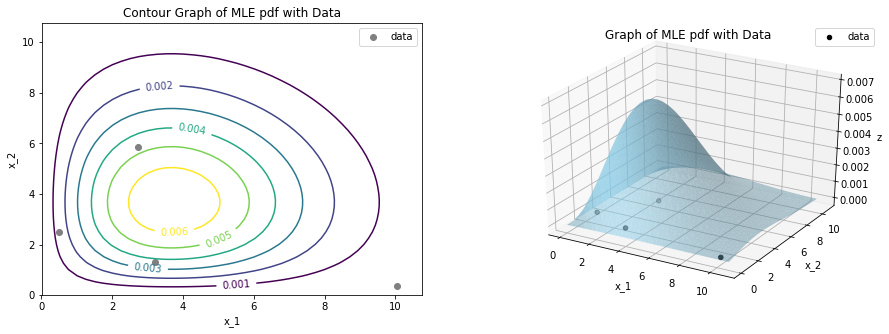

In [2]:
#cover the domain of the pdf with a grid and get the coordinates of the grid vertices
delta = 0.25
x = np.arange(0.01, 11, delta)
y = np.arange(0.01, 11, delta)
x, y = np.meshgrid(x, y)

#compute the value of the pdf over each grid vertex
lambda_0 = 0.037
z = np.multiply(lambda_0**2 * np.multiply(x, y), np.exp(-lambda_0 * (x**2 + y**2)))

fig = plt.figure(figsize=(15, 5))

#plot contour map of pdf with data in R^2 (Cartesian plane)
ax1 = fig.add_subplot(121) 
contour = ax1.contour(x, y, z)
ax1.clabel(contour, inline=1, fontsize=10)
ax1.scatter([0.5, 3.2, 2.72, 10.047], [2.5, 1.3, 5.84, 0.354], color='gray', label='data')
ax1.set_title('Contour Graph of MLE pdf with Data')
ax1.set_xlabel('x_1')
ax1.set_ylabel('x_2')
ax1.legend(loc='best')

#plot 3D suface of pdf in R^3, with data in R^2
ax2 = fig.add_subplot(122, projection='3d') 
ax2.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth=0.2, antialiased=True, color='skyblue', alpha=0.5)
ax2.scatter([0.5, 3.2, 2.72, 10.047], [2.5, 1.3, 5.84, 0.354], [0] * 4, color='black', label='data')
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')
ax2.set_zlabel('z')
ax2.set_title('Graph of MLE pdf with Data')
ax2.legend(loc='best')


plt.show()

## Problem 3: Frequentist Stats

**Coding required**

Read the data set contained in [Homework_1_Data.txt](Homework_1_Data.txt). Each data point is a two-dimensional vector, $\mathbf{x} = (x_1, x_2)$.

### Part (A): Visualization and Interpretation

1. Make a 2-D visualization the distribution of the data. 

1. Visualize the the pdf, $f_X$, of the underlying distribution of the data.

1. Visualize the distribution defined by $f_{x_2 \mid x_1}$ for $x_1 \in [3.99, 4.01]$.

1. Visualize the distribution defined by $f_{x_1}$.

**Solutions:**

Bullet #1 and bullet #2 are asking related but subtly different questions. Asking how a data set is distributed is literally asking for a sense of where the points in the data are located over the domain of all possible values (over $\mathbb{R}^2$ in this case). There are many ways to visualize this information, certainly a scatter plot will suffice. If you know the underlying distribution of the data (say the data is draw from a bivariate normal distribution), then visualizing the pdf of this underlying distribution can be helpful for understanding your data, but the pdf of the underlying distribution does not tell you about the empirical distribution of the data! 

On the other hand, a scatter plot of the data, while it illustrates how the data is empirically distributed, does not immediately allow us to visualize the pdf of the underlying distribution. Recall that a pdf, for our data, will be a real-valued function of two variables whose output at $(x_1, x_2)$ tells us the relative frequency of observing such a point. Thus, a visualization of the pdf of the underlying distribution will require us to make histograms, contour maps or heat maps (visualizations that attaches a notion of frequency to each point in the domain of the data).

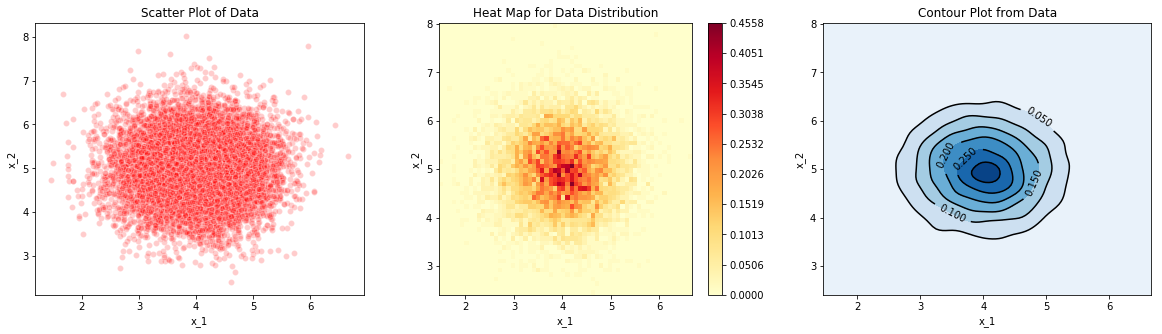

In [3]:
#read data
data = np.genfromtxt('Homework_1_Data.txt', delimiter=',')
x = data[:, 0]
y = data[:, 1]

#visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

#scatter plot
ax1.scatter(x, y, color='red', edgecolor='white', alpha=0.2)
ax1.set_xlabel('x_1')
ax1.set_ylabel('x_2')
ax1.set_title('Scatter Plot of Data')

#histogram the x, y values from data
heatmap, xedges, yedges = np.histogram2d(x, y, bins=60, normed=1)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#make heat map: map frequency of each bin in histogram to color intensity
bar = ax2.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.YlOrRd)
#plot a color bar 
cbar = fig.colorbar(bar, ticks=np.linspace(heatmap.min(), heatmap.max(), 10), ax=ax2)
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')
ax2.set_title('Heat Map for Data Distribution')

#create an approximation of the density function from data, using a Guassian kernel
gaussian_ker = gaussian(np.vstack([x, y])) 
#create a grid of the domain of the data
x_mesh, y_mesh = np.mgrid[x.min():x.max():100j, y.min():y.max():100j] 
#get the coordinates of the grid points
grid_pts = np.vstack([x_mesh.ravel(), y_mesh.ravel()])  
#evaluate the approximate density function over each grid point
z = gaussian_ker(grid_pts).T.reshape(x_mesh.shape)
#plot contour map of the density function
ax3.contourf(x_mesh, y_mesh, z, cmap='Blues')
#plot the level sets
level_set = ax3.contour(x_mesh, y_mesh, z, colors='black')
#label the level sets
ax3.clabel(level_set, inline=1, fontsize=10)
ax3.set_xlabel('x_1')
ax3.set_ylabel('x_2')
ax3.set_title('Contour Plot from Data')

plt.show()

The function $f_{x_2 \mid x_1}$ for $x_1 \in [3.99, 4.01]$ is the pdf of the distribution of $x_2$ whose corresponding $x_1$ is in the range $[3.99, 4.01]$; the function $f_{x_1}$ is the pdf of the distribution of $x_1$, regardless of the values of the corresponding $x_2$. Since these two functions describe the distribution of single variables, their graphs will be one-dimensional. To approximate the pdf of the underlying distributions, we plot the histograms of each set of values and plot the best fitting curve to each histogram (in each case, we will plot the best fitting normal curve, since the histograms look approximately normal).

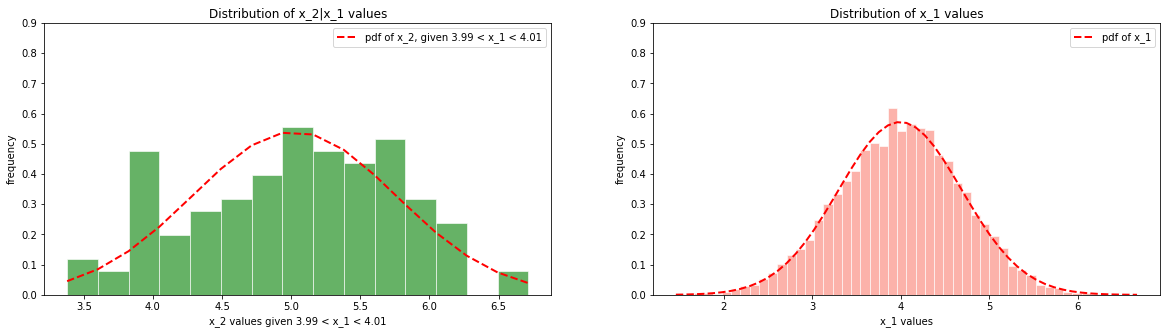

In [4]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

def create_viz(viz_axis, viz_data, viz_label, viz_color,  x_label, viz_title, bin_count):
    
    #fit a normal distribution to data
    (mu, sigma) = norm.fit(viz_data)
    
    
    #plot histogram
    _, viz_bins, _ = viz_axis.hist(viz_data, bins=bin_count, facecolor=viz_color, edgecolor='white', alpha=0.6, normed=True)

    #plot fitted normal pdf
    freq = mlab.normpdf(viz_bins, mu, sigma)
    viz_axis.plot(viz_bins, freq, 'r--', linewidth=2, label=viz_label)
    viz_axis.set_xlabel(x_label)
    viz_axis.set_ylabel('frequency')
    viz_axis.set_title(viz_title)
    viz_axis.legend(loc='best')
    viz_axis.set_ylim([0, 0.9])


create_viz(
    ax1,
    data[(data[:,0]>3.99) & (data[:,0]<4.01)][:,1],
    'pdf of x_2, given 3.99 < x_1 < 4.01',
    'green',
    'x_2 values given 3.99 < x_1 < 4.01',
    'Distribution of x_2|x_1 values',
    15
)

create_viz(
    ax2,
    data[:, 0],
    'pdf of x_1',
    'salmon',
    'x_1 values',
    'Distribution of x_1 values',
    50
)


plt.show()


### Part (B): Estimation using bootstrap

1. Empirically estimate the mean of the distribution $f_{x_1}$. Estimate, also the SE (standard error) of the estimate.

1. Empirically estimate the standard deviation of the distribution $f_{x_2 \mid x_1}$, for $x_1 \in [3.99, 4.01]$. Estimate, also the SE (standard error) of the estimate.

1. Given the SE, How many digits in your standard deviation estimate are significant? Explain why.

In obtaining estimates for this problem we want you to 

- define a function called *get_bootstrap_sample(dataset)* to generate each bootstrap sample
- and then another function *perform_bootstrap(dataset)* to generate all the samples. 

They should both take as parameters the dataset from which you'll be drawing samples. *perform_bootstrap* should call *get_bootstrap_sample* and return a sequence of bootstrap samples.  *get_bootstrap_sample* should return an individual bootstrap sample.


**Solutions:**

We can emprically estimate the mean of the distribution $f_{x_1}$ by taking the average of the $x_1$ values in our dataset; we can estimate the std of the distribution $f_{x_2 \mid x_1}$, for $x_1 \in [3.99, 4.01]$, by filtering the data for points with $x_1 \in [3.99, 4.01]$, then taking the std of the $x_2$ values of the filtered dataset. 

We note that since our estimate of these two stats rely on the sample of data we obtain from the underlying distribution, our estimates will vary from sample to sample. Thus, we would like to quantify how much our mean or std estimates can vary given different samples of data. One way to quantify the variation in our estimates is through computing the standard error of the estimate. The standard error is the standard deviation of the distribution of an estimate.

When you know the distribution of a particular estimate, you can compute the standard error (the standard deviation of this estimate) analytically. For example, we know from the central limit theorem that regardless of the underlying distribution of the population, whenever we estimate the mean of a sample data set, our estimate will be distributed normally. That is, the way our mean estimate varies from sample set to sample set is described by a normal distribution. In this case, we can compute the standard error of the mean estimate explicitly.

You can also approximate the standard error empirically. That is, if we can repeatedly sample from the underlying distribution of the data, i.e. obtain new data, then we can compute the mean (or std) for each sample and compute the standard deviation of our estimate. Since we don't know the underlying distribution of the data, we simulate drawing new data by resampling our existing data with replacement (bootstrapping).

In [5]:
def get_bootstrap_sample(dataset):
    
    ## By default np.random.choice samples with replacement
    sample_indices = np.random.choice(range(len(dataset)), len(dataset))
    sample = dataset[sample_indices]
    
    return sample

def perform_bootstrap(dataset, num_bootstraps=1000):
    
    bootstrap_samples = []
    
    for i in range(num_bootstraps):
        bootstrap_samples.append(get_bootstrap_sample(dataset))
    
    return np.array(bootstrap_samples)


In [18]:
np.random.seed(20023)

# Generate 1000 bootstrap samples
bootstrap_samples = perform_bootstrap(data)

# Get means of the x_1 marginal
marginal_means = bootstrap_samples[:,:,0].mean(axis=1)

# get standard deviation of the x_2|x_1 conditional distribution
cond_stds = [sample[(sample[:, 0] < 4.01) & (sample[:, 0] > 3.99)][:,1].std() for sample in bootstrap_samples]

print('mean of f_x1:{:.5g}, with SE:{:.3g}'.format(np.mean(marginal_means), np.std(marginal_means)))
print('std of f_x2|x1:{:.4g}, with SE:{:.3g}'.format(np.mean(cond_stds), np.std(cond_stds)))

mean of f_x1:3.993, with SE:0.00707
std of f_x2|x1:0.7346, with SE:0.0402


There are a number of ways to calculate the number of significant digits, but in this case since variation for the mean estimate starts in the fourth digit, and variation in the stand deviation starts in the second digit, we'd say that the mean estimate is significant to 4 digits and the std estimate is significant to 2 digits.

## Problem 4: Missing Data

**Coding required**

Missing data is a very important topic in statistics and machine learning. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement. Please load `wine_quality_missing.csv`.  (If pandas makes your life easier, feel free to use it).

1.  One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataset.  How many rows does our imputed dataset have?

1. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that **column**.  This is called *mean imputation*.  How many rows does our mean imputed dataset have?

1.  Empirically estimate the pdf of the distribution of the sample mean of the ash predictor under drop imputation and mean imputation. Use the perform_bootstrap function from problem 3.

1. Compare the standard errors (SE) of the distributions under drop imputation and mean imputation in the previous question.  Can you suggest one or two reasons why they may be different?

**Solutions:**


In [7]:
wine_df = pd.read_csv("wine_quality_missing.csv")
wine_rows = wine_df.shape[0]
print("The number of observations in the wine dataset is %d" % wine_rows)

The number of observations in the wine dataset is 178


In [8]:
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


** Question 1:  One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataset.  How many rows does our imputed dataset have? **

Pandas provides a dropna() method on the data frame that allows us to easily do drop imputation.  Taking advantage of this method, we see that drop imputation on our dataset gives us 43 rows.

In [9]:
wine_df.Ash.isnull().sum()


22

In [10]:
wine_drop = wine_df.dropna()
total_drop_rows = wine_drop.shape[0]
print("After drop imputation {} rows remain".format(total_drop_rows))

After drop imputation 43 rows remain


** Question 2:  Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that **column**.  This is called *mean imputation*.  How many rows does our mean imputed dataset have? **

Pandas also helpfully provides a fillna() method on the data frame that we can take advantage of to do mean imputation.  Using fillna, we see that mean imputation on our dataset gives us 178 observations (as expected we shouldn't lose any observations as a result of mean imputation).

In [11]:
wine_mean = wine_df.fillna(wine_df.mean())
total_mean_rows = wine_mean.shape[0]
print("After mean imputation {} rows remain".format(total_mean_rows))

After mean imputation 178 rows remain


** Question 3:  Empirically estimate the pdf of the distribution of the sample mean of the ash predictor under drop imputation and mean imputation. Use the perform_bootstrap function from problem **

In problem 3 we generated the bootstrap samples first and then went through the process of imputation.  In this problem we're imputing first and then generating bootstrap samples.  It used to be the case that generally one would generate bootstrap samples prior to imputation.  Some recent papers have demonstrated on a number of datasets that imputing first and then bootstrapping (particularly in multiple imputation) is also legitimate and gives the same estimates and standard error.

In [12]:
drop_bootstrap_samples = perform_bootstrap(wine_drop.Ash.as_matrix())
mean_bootstrap_samples = perform_bootstrap(wine_mean.Ash.as_matrix())

drop_bootstrap_means = drop_bootstrap_samples.mean(axis=1)
mean_bootstrap_means = mean_bootstrap_samples.mean(axis=1)


In [13]:
def create_viz2(viz_axis, viz_data, viz_label, viz_color,  x_label, viz_title, bin_count):
    
    #fit a normal distribution to data
    (mu, sigma) = norm.fit(viz_data)
    
    
    #plot histogram
    _, viz_bins, _ = viz_axis.hist(viz_data, bins=bin_count, facecolor=viz_color, edgecolor='white', alpha=0.6, normed=True)

    #plot fitted normal pdf
    freq = mlab.normpdf(viz_bins, mu, sigma)
    viz_axis.plot(viz_bins, freq, 'r--', linewidth=2, label=viz_label)
    viz_axis.set_xlabel(x_label)
    viz_axis.set_ylabel('frequency')
    viz_axis.set_title(viz_title)
    viz_axis.legend(loc='best')

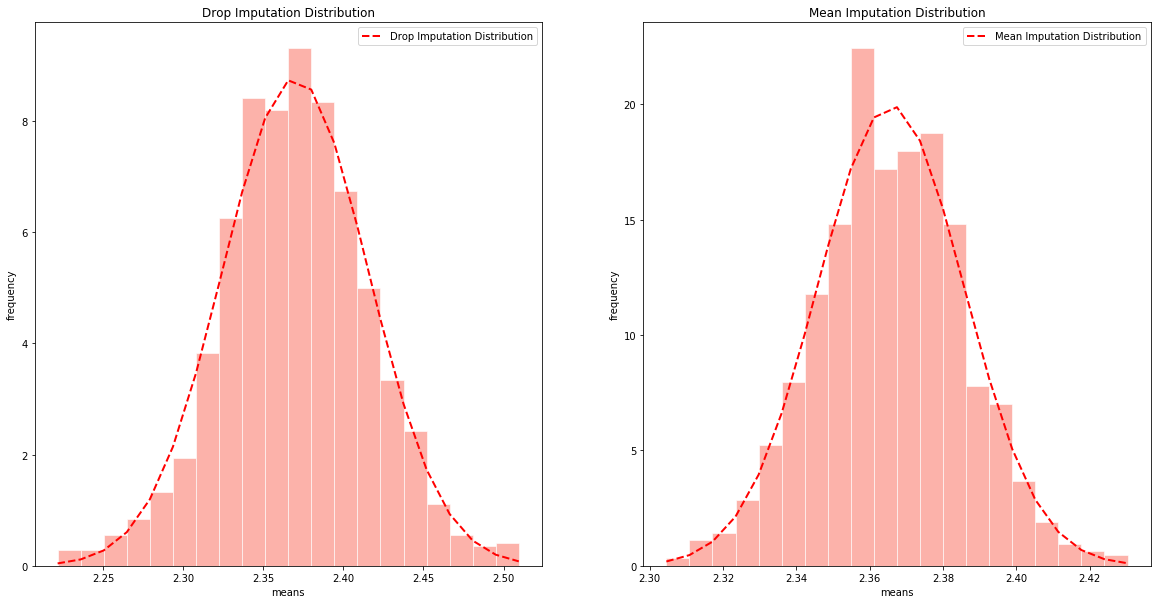

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

create_viz2(
    ax1,
    drop_bootstrap_means,
    'Drop Imputation Distribution',
    'salmon',
    'means',
    'Drop Imputation Distribution',
    20
)

create_viz2(
    ax2,
    mean_bootstrap_means,
    'Mean Imputation Distribution',
    'salmon',
    'means',
    'Mean Imputation Distribution',
    20
)

In [15]:
print('mean of drop imputation:{:.4g}, with SE:{:.4g}'.format(np.mean(drop_bootstrap_means), np.std(drop_bootstrap_means)))
print('mean of mean imputation:{:.4g}, with SE:{:.4g}'.format(np.mean(mean_bootstrap_means), np.std(mean_bootstrap_means)))

mean of drop imputation:2.37, with SE:0.04549
mean of mean imputation:2.366, with SE:0.02001


** Question 4:  Compare the standard errors (SE) of the distributions under drop imputation and mean imputation in the previous question.  Can you suggest one or two reasons why they may be different? **

We see that both methods give almost the same estimate for the means, but that the standard error of drop imputation is over two times the standard error for mean imputation.  There are two sources for the difference in precision.  Drop imputation uses a sample of 43 vs 178 for mean imputation.  The factor of four times difference in sample size contributes to a factor of 2 difference in standard error and as such is the predominant factor in the the difference in standard error between the two imputation methods.  The contributing factor to the difference (but to a much lesser extent) is that mean imputation "collapses" the 22 missing values in the Ash column into one value -- the mean of that column.  So for the purposes of mean imputation instead of having the variablility of 178 observations in the sample, you only have the variability of 156.